<a href="https://colab.research.google.com/github/EikESousA/mestrado-paa/blob/main/problema_mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema da Mochila

Imagine que você irá realizar uma viagem de alguns dias, obviamente necessitará levar uma mochila com alguns itens dentro. Se você for uma pessoa organizada provavelmente fará uma pequena lista com todos os objetos que poderia levar (roupas, livros, aparelhos eletrônicos, etc.), mesmo que essa lista seja imaginária ela irá existir em algum momento. No entanto, uma mochila não é infinita e cada item tem um peso, por exemplo uma mochila que comporta até quatro livros não consegue levar cinco ou mais livros de tamanhos semelhantes na viagem.



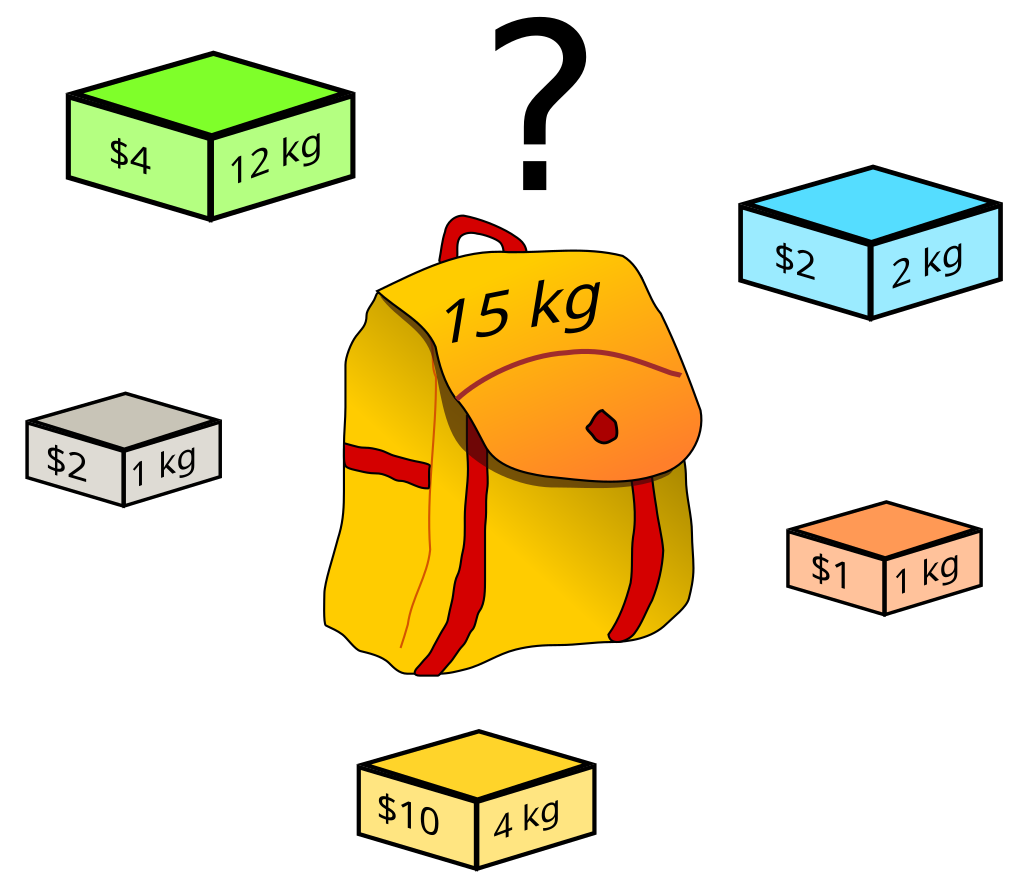

## Tipos

*  ### Mochila Binária (0 - 1)

Nesse caso só é possível pegar uma única unidade de cada item (não há repetições)

*  ### Mochila Inteira

Uma variação da mochila binária onde cada item possui uma quantidade infinita de unidades.

*  ### Mochila Compartimentada

A mochila possui compartimentos (comida, roupas, livros) e cada compartimento possui suas limitações.

*  ### Mochilas Multiplas

Possui mais de uma mochila.


## Solução

Método de Branch-and-Bound com Programação Dinamica e Enumeração Implicita. O problema da mochila é um dos 21 problemas NP-completos de Richard Karp, exposto em 1972.
Ainda existem algumas soluções aproximadas como PSE (procedimento de separação e evolução), Algoritmo Guloso e Algoritmos Genéticos.

In [6]:
import time
import random

In [7]:
def create_datas(n):
  values = [random.randint(10, 100) for _ in range(i)]
  weights = [random.randint(10, 50) for _ in range(i)]
  capacity = n * 10 * random.randint(10, 50)
  return values, weights, n, capacity

In [8]:
class KnapsackSolver:
    def __init__(self, values, weights, capacity):
        self.values = values
        self.weights = weights
        self.capacity = capacity
        self.n = len(values)
        self.max_value = 0
        self.best_solution = []
        self.count = 0

    def knapsack(self, index=0, current_weight=0, current_value=0, solution=[]):
        self.count = self.count + 1
        if index == self.n:
            if current_value > self.max_value:
                self.max_value = current_value
                self.best_solution = solution[:]
            return

        if current_weight > self.capacity:
            return

        solution.append(index)
        self.knapsack(index + 1, current_weight + self.weights[index], current_value + self.values[index], solution)
        solution.pop()

        self.knapsack(index + 1, current_weight, current_value, solution)

    def solve(self):
        start_time = time.time()
        self.knapsack()
        end_time = time.time()
        execution_time = end_time - start_time

        print("|-------------------ENUMERACAO IMPLICITA--------------------|")
        print("| Número de itens :", self.n)
        print("| Capacidade :", self.capacity)
        print("| Itens selecionados:", self.best_solution)
        print("| Número de comparações:", self.count)
        print("| O valor máximo que pode ser obtido é:", self.max_value)
        print("| Tempo de execução:", execution_time)
        print("|-----------------------------------------------------------|")

In [9]:
for i in range(3, 33):
  values, weights, n, capacity = create_datas(i)
  solver = KnapsackSolver(values, weights, capacity)
  solver.solve()

|-------------------ENUMERACAO IMPLICITA--------------------|
| Número de itens : 3
| Capacidade : 840
| Itens selecionados: [0, 1, 2]
| Número de comparações: 15
| O valor máximo que pode ser obtido é: 153
| Tempo de execução: 1.049041748046875e-05
|-----------------------------------------------------------|
|-------------------ENUMERACAO IMPLICITA--------------------|
| Número de itens : 4
| Capacidade : 1680
| Itens selecionados: [0, 1, 2, 3]
| Número de comparações: 31
| O valor máximo que pode ser obtido é: 211
| Tempo de execução: 1.7881393432617188e-05
|-----------------------------------------------------------|
|-------------------ENUMERACAO IMPLICITA--------------------|
| Número de itens : 5
| Capacidade : 1150
| Itens selecionados: [0, 1, 2, 3, 4]
| Número de comparações: 63
| O valor máximo que pode ser obtido é: 222
| Tempo de execução: 3.933906555175781e-05
|-----------------------------------------------------------|
|-------------------ENUMERACAO IMPLICITA------------

## Referências

* Marques F.P.; Arenales M. N. (2002). "O problema da mochila compartimentada e aplicações". Pesquisa Operacional, 22(3):285-304

* Yanasse, H.H.; Soma, N.Y. (1987). "A new enumeration scheme for the knapsack problem". Discrete Applied Mathematics, 18:235-245.